# Pandas Tutorial - TR

# İçindekiler:
1. <a href="#pandas-nedir"> Pandas Nedir? </a>
2. <a href="#df-olusturma"> DataFrame Nasıl Oluşturulur? </a>
3. <a href="#dosya-islemleri"> Veriyi dosyaya yazmak, dışardan veri çekmek  </a>
4. <a href="#veriyi-goruntuleme"> Veriyi Görüntüleme  </a>
5. <a href="#secim-yapma"> Seçim Nasıl Yapılır?  </a>
6. <a href="#alt-kume"> Altküme İşlemleri </a>
7. <a href="#islemler"> Temel İstatistiksel İşlemler  </a>
8. <a href="#kayip-veri"> Kayıp Veri  </a>
9.<a href="#gruplama"> Gruplama </a>
10. <a href="#yeniden-sekillendirme"> Yeniden Şekillendirme  </a>
11. <a href="#df-birlestirme"> DataFrameleri Birleştirme  </a>


## Pandas Nedir? <a id="pandas-nedir"></a>
İşlenmemiş veriyi hızlı ve kolay bir şekilde incelememize, temizlememize ve işlememize yardım eden; Python'da veri analizi yapmayı kolaylaştıran bir Python kütüphanesidir.
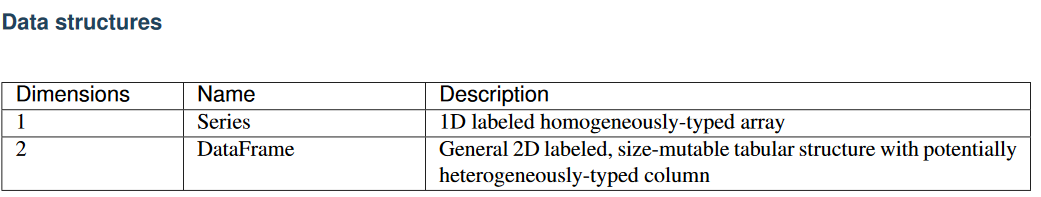

In [1]:
import numpy as np
import pandas as pd

## DataFrame nasıl oluşturulur? <a id="df-olusturma"></a>

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8]) # Seriler tek boyutlu arraylerdir.
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

* *dictionary kullanarak dataframe oluturma:*

In [3]:
df = pd.DataFrame({'A': [1,2,3,4,5,6],
                   'B': pd.Timestamp('20130102'),
                   'C': pd.Series(1, index=list(range(6)), dtype='float32'),
                   'D': np.array([3]*6, dtype='int32'),
                   'E': pd.Categorical(["test", "train", "test", "train", "test", "train"]),
                   'F': 'foo'})
df

,A,B,C,D,E,F
0,1,2013-01-02,1.0,3,test,foo
1,2,2013-01-02,1.0,3,train,foo
2,3,2013-01-02,1.0,3,test,foo
3,4,2013-01-02,1.0,3,train,foo
4,5,2013-01-02,1.0,3,test,foo
5,6,2013-01-02,1.0,3,train,foo


* *np array ile dataframe oluşturma:*

In [4]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.633703,0.289577,-1.476988,-0.215141
2013-01-02,0.815246,0.504205,0.348250,0.506415
2013-01-03,-0.589489,0.672244,0.019977,0.235799
2013-01-04,-0.153538,-0.067603,-0.473969,-0.117646
2013-01-05,-1.579922,0.197593,-0.239009,-1.389883
2013-01-06,0.324160,-0.140056,0.186913,-0.398107


*Dataframe oluşturmak için farklı bir yol:*

In [5]:
df2 = pd.DataFrame({"A" : [1,2,3],
                    "B" : [4,5,6]} , index=[1,2,3])
df2

,A,B
1,1,4
2,2,5
3,3,6


In [6]:
df2 = pd.DataFrame([[1,4],
                    [2,5],
                    [3,6]] ,
                   index=[1,2,3] , columns=["A","B"])
df2

,A,B
1,1,4
2,2,5
3,3,6


In [7]:
df2["C"] = df2["A"] * df2["B"] # yeni sütun ekleme
df2

,A,B,C
1,1,4,4
2,2,5,10
3,3,6,18


In [8]:
del df2["B"]  # sütun silme
df2

,A,C
1,1,4
2,2,10
3,3,18


In [9]:
df2.insert(loc=1 , column="new_col" , value= df2["A"])
df2

,A,new_col,C
1,1,1,4
2,2,2,10
3,3,3,18


In [10]:
df2.assign(D =lambda x: x["A"] + x["C"],
          E =lambda x: x["A"] - x["C"])

,A,new_col,C,D,E
1,1,1,4,5,-3
2,2,2,10,12,-8
3,3,3,18,21,-15


## Veriyi dosyaya yazmak, dışardan veri çekmek <a id="dosya-islemleri"></a>

* `df.to_*` : (csv, hdf, excel vb.) dosyaya yazma
* `pd.read_*` : (csv, hdf, excel vb.) dosyadan okuma

In [11]:
df.to_csv("foo.csv") #csv dosyasına yazma.

In [12]:
pd.read_csv("foo.csv") #csv dosyasından okuma.

,Unnamed: 0,A,B,C,D
0,2013-01-01,1.633703,0.289577,-1.476988,-0.215141
1,2013-01-02,0.815246,0.504205,0.348250,0.506415
2,2013-01-03,-0.589489,0.672244,0.019977,0.235799
3,2013-01-04,-0.153538,-0.067603,-0.473969,-0.117646
4,2013-01-05,-1.579922,0.197593,-0.239009,-1.389883
5,2013-01-06,0.324160,-0.140056,0.186913,-0.398107


In [13]:
df = pd.read_csv("data/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Veriyi görüntüleme <a id="veriyi-goruntuleme"></a>

* `df.dtypes` : dataframedeki sütunların typelarını döndürür.
* `df.info()` : sütunların temel özelliklerini döndürür.

In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* `df.head()` : ilk 5 satırı döndürür.
* `df.tail()` : son 5 satırı döndürür.
* `df.index` : satırların indislerini listeler
* `df.columns` : sütunların isimlerini döndürür.
* `df.describe()` : temel istatistikler sonuçları gösterir. 
* `df.T` : veriyi transpoz eder.
* `df.sort_index()` : axise bağlı olarak indisleri sıralar.
* `df.sort_values()` : dataframedeki değerleri sıralar.

In [16]:
df.head() # ilk beş satırı gösterir.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.tail(n = 4) #sondan n satırı gösterir.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [18]:
df.index 

RangeIndex(start=0, stop=891, step=1)

In [19]:
df.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df.sort_index(axis= 0 , ascending=False) #satırların indislerini büyükten küçüğe sıralar.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [22]:
df.sort_index(axis= 1 , ascending=False) #sütunların indislerini büyükten küçüğe sıralar.

,Ticket,Survived,SibSp,Sex,Pclass,PassengerId,Parch,Name,Fare,Embarked,Cabin,Age
0,A/5 21171,0,1,male,3,1,0,"Braund, Mr. Owen Harris",7.2500,S,NaN,22.0
1,PC 17599,1,1,female,1,2,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,C,C85,38.0
2,STON/O2. 3101282,1,0,female,3,3,0,"Heikkinen, Miss. Laina",7.9250,S,NaN,26.0
3,113803,1,1,female,1,4,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1000,S,C123,35.0
4,373450,0,0,male,3,5,0,"Allen, Mr. William Henry",8.0500,S,NaN,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,211536,0,0,male,2,887,0,"Montvila, Rev. Juozas",13.0000,S,NaN,27.0
887,112053,1,0,female,1,888,0,"Graham, Miss. Margaret Edith",30.0000,S,B42,19.0
888,W./C. 6607,0,1,female,3,889,2,"Johnston, Miss. Catherine Helen ""Carrie""",23.4500,S,NaN,NaN
889,111369,1,0,male,1,890,0,"Behr, Mr. Karl Howell",30.0000,C,C148,26.0


In [23]:
df.sort_values(by="Name") # "Name" sütununu sıralar

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S


## Seçim Nasıl Yapılır? <a id="secim-yapma"></a>

* `df[col_name]` : tek sütunu seçer.
* `df.loc[col_name]` : sütunu seçer.
* `df.loc[row]` : satırı seçer.
* `df.iloc[index]` : belirttiğimiz aralığı seçer.
* `df[].isin()` : isin içindeki değere göre filtreleme yapar.

In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [26]:
df.loc[3] #3. satır.

PassengerId                                               4
Survived                                                  1
Pclass                                                    1
Name           Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                                  female
Age                                                      35
SibSp                                                     1
Parch                                                     0
Ticket                                               113803
Fare                                                   53.1
Cabin                                                  C123
Embarked                                                  S
Name: 3, dtype: object

In [27]:
df.loc[3:5, ["Name"]]

,Name
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"


In [28]:
df.iloc[:,4:]

,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,female,35.0,1,0,113803,53.1000,C123,S
4,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,211536,13.0000,NaN,S
887,female,19.0,0,0,112053,30.0000,B42,S
888,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,male,26.0,0,0,111369,30.0000,C148,C


* Koşulla indexleme:

In [29]:
df[df["Pclass"] == 3 ] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [30]:
df[df["Sex"].isin(["male"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Altküme işlemleri:  <a id="alt-kume"></a>

In [31]:
df.drop_duplicates() # tekrarlayan satırları atar

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:
df.sample(frac=0.1) #random satır seçer.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
236,237,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S
83,84,0,1,"Carrau, Mr. Francisco M",male,28.0,0,0,113059,47.1000,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
...,...,...,...,...,...,...,...,...,...,...,...,...
729,730,0,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,STON/O2. 3101271,7.9250,NaN,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S
338,339,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S
430,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.5500,C52,S


In [33]:
df.sample(n=5) # random n satır seçer

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
113,114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C


## Temel istatistiksel işlemler: <a id="islemler"></a>

* `df.mean()` : ortalama hesaplar.
* `df.count()` : non-null değerlerin sayısını döndürür.
* `df.value_counts()` : veri sayısını döndürür.
* `df.sum()` : sütunların toplamını hesaplar.
* `df.median()` : medyanı hesaplar.
* `df.quantile(0.25,0.75)` : çeyrekler açığını hesaplar.
* `df.var()` : varyansı hesaplar.
* `df.std()` : standart sapmayı hesaplar.
* `df.apply()` : içine yazan fonksiyonu veriye uygular.


In [34]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
df["Age"].mean()

29.69911764705882

In [36]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [37]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [38]:
df.sum()

PassengerId                                               397386
Survived                                                     342
Pclass                                                      2057
Name           Braund, Mr. Owen HarrisCumings, Mrs. John Brad...
Sex            malefemalefemalefemalemalemalemalemalefemalefe...
Age                                                      21205.2
SibSp                                                        466
Parch                                                        340
Ticket         A/5 21171PC 17599STON/O2. 31012821138033734503...
Fare                                                     28693.9
dtype: object

In [39]:
df["Age"].median()

28.0

In [40]:
df["Age"].var()

211.01912474630802

In [41]:
df["Age"].std()

14.526497332334042

## Kayıp veri: <a id="kayip-veri"></a>

* `pd.isna(df)` : dataframedeki değerlerin NaN olup olmadığı kontrol eder.
* `df.isnull()` : Null değerleri true döndürür.
* `df.dropna()` : NaN*(not a number)* değerlerin olduğu satırları atar.
* `df.fillna()` : NaN değerleri içine yazılan değer ile doldurur.

In [42]:
pd.isna(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
droppednulldf = df.dropna()   #null değerleri atar. Default değeri inplace=False olduğu için orj frame üzerinde değişiklik yapmaz.
droppednulldf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [46]:
df["Age"].fillna(value=df["Age"].mean() , inplace=True)   #Age sütunundaki NaN değerleri yaş ortalamasıyla doldurduk.
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Gruplama: <a id="gruplama"></a>

In [47]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.759960,-0.820939
1,bar,one,-0.031875,-0.729869
2,foo,two,-1.431754,-0.243325
3,bar,three,0.903166,-0.133546
4,foo,two,0.295948,1.106289
5,bar,two,2.338550,-1.420082
6,foo,one,0.166977,-0.671546
7,foo,three,0.729957,0.472536


In [48]:
df.groupby("A").sum()

,C,D
A,,
bar,3.209841,-2.283497
foo,0.521087,-0.156985


In [49]:
df.groupby(["A","B"]).sum()

C         D
A   B                        
bar one   -0.031875 -0.729869
    three  0.903166 -0.133546
    two    2.338550 -1.420082
foo one    0.926936 -1.492485
    three  0.729957  0.472536
    two   -1.135807  0.862964

## Yeniden şekillendirme: <a id="yeniden-sekillendirme"></a>

In [50]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [51]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [52]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [53]:
df

A         B
first second                    
bar   one     0.755763  0.814142
      two    -1.370253 -1.722779
baz   one     0.186565 -1.382432
      two    -0.102307  0.475870
foo   one    -1.048775  0.644108
      two     0.606227  0.545785
qux   one    -0.044755 -1.046873
      two     1.114931 -0.232342

In [54]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.755763  0.814142
      two    -1.370253 -1.722779
baz   one     0.186565 -1.382432
      two    -0.102307  0.475870

In [55]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.755763
               B    0.814142
       two     A   -1.370253
               B   -1.722779
baz    one     A    0.186565
               B   -1.382432
       two     A   -0.102307
               B    0.475870
dtype: float64

In [56]:
stacked.unstack()

A         B
first second                    
bar   one     0.755763  0.814142
      two    -1.370253 -1.722779
baz   one     0.186565 -1.382432
      two    -0.102307  0.475870

In [57]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three']*3,
                   'B': ['A', 'B', 'C']*4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar']*2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.492760,0.569161
1,one,B,foo,-0.417993,-0.653599
2,two,C,foo,1.681989,1.075603
3,three,A,bar,-0.944188,-0.248004
4,one,B,bar,-0.552712,0.857870
5,one,C,bar,1.530487,-0.460446
6,two,A,foo,-1.638516,-0.367395
7,three,B,foo,-1.829096,0.904411
8,one,C,foo,-0.384992,0.460319
9,one,A,bar,1.057170,0.104104


In [58]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.057170  0.492760
      B -0.552712 -0.417993
      C  1.530487 -0.384992
three A -0.944188       NaN
      B       NaN -1.829096
      C -1.340544       NaN
two   A       NaN -1.638516
      B -1.480897       NaN
      C       NaN  1.681989

## DataFrameleri Birleştirme <a id="df-birlestirme"></a>

**pd.concat():**

In [59]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [60]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                     'B': ['B4', 'B5', 'B6', 'B7'],
                     'C': ['C4', 'C5', 'C6', 'C7'],
                     'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [61]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                     'B': ['B8', 'B9', 'B10', 'B11'],
                     'C': ['C8', 'C9', 'C10', 'C11'],
                     'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [62]:
df1.append(df2)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [63]:
frames = [df1, df2, df3]
pd.concat(frames)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [64]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                    index=[2, 3, 6, 7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [65]:
pd.concat([df1, df4], axis=1, sort=False)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


**pd.merge()**

In [66]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [67]:
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [68]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


**df.join():**

In [69]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                      'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [70]:
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])
right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [71]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
